## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [17]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(8).head(5).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,Italy,Spain,France,Belgium,Canada,Turkey,Germany,Brazil,Mexico,Iran,Netherlands,Peru,Russia,Indonesia
4/17/20,3857,847,575,687,761,306,58,126,300,217,37,89,144,26,41,24
4/18/20,1891,888,482,41,642,290,0,121,107,213,60,73,142,48,40,15
4/19/20,1997,596,433,410,395,230,132,127,127,108,104,87,83,52,48,47


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2490.8
France             817.6
United Kingdom     770.8
Spain              541.8
Italy              540.4
Belgium            302.2
Germany            263.2
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 38.4 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 143 kB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 10.0 MB/s eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1554      0 --:--:-- --:--:-- --:--:--  1543
100 59337  100 59337    0     0   256k      0 --:--:-- --:--:-- --:--:--  256k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Country/Region,,,,,,,,,,,,,
US,12794,14695,16544,18586,20462,22019,23528,25831,28325,32916,36773,38664,40661
Italy,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660
Spain,14045,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453
France,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718
United Kingdom,6159,7097,7978,8958,9875,10612,11329,12107,12868,13729,14576,15464,16060
Belgium,2035,2240,2523,3019,3346,3600,3903,4157,4440,4857,5163,5453,5683
Iran,3872,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958,5031,5118
Germany,2016,2349,2607,2767,2736,3022,3194,3294,3804,4052,4352,4459,4586
China,3212,3213,3215,3216,3219,3219,3221,3221,3222,3222,4512,4512,4512


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Country/Region,,,,,,,,,,,,
US,1901,1849,2042,1876,1557,1509,2303,2494,4591,3857,1891,1997
United Kingdom,938,881,980,917,737,717,778,761,861,847,888,596
Italy,542,610,570,619,431,566,602,578,525,575,482,433
Spain,747,655,634,525,603,547,300,652,607,687,41,410
France,541,1341,987,635,561,574,762,1438,753,761,642,395
Belgium,205,283,496,327,254,303,254,283,417,306,290,230
Canada,25,41,25,48,39,32,75,52,143,58,0,132
Turkey,87,96,98,95,97,98,107,115,125,126,121,127
Germany,333,258,160,-31,286,172,100,510,248,300,107,127


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1901,1849,2042,1876,1557,1509,2303,2494,4591,3857,1891,1997"
data-datasets="938,881,980,917,737,717,778,761,861,847,888,596"
data-datasets="542,610,570,619,431,566,602,578,525,575,482,433"
data-datasets="747,655,634,525,603,547,300,652,607,687,41,410"
data-datasets="541,1341,987,635,561,574,762,1438,753,761,642,395"
data-datasets="205,283,496,327,254,303,254,283,417,306,290,230"
data-datasets="25,41,25,48,39,32,75,52,143,58,0,132"
data-datasets="87,96,98,95,97,98,107,115,125,126,121,127"
data-datasets="333,258,160,-31,286,172,100,510,248,300,107,127"
data-datasets="133,131,107,67,99,105,204,204,188,217,213,108"
data-datasets="16,33,20,39,40,23,36,74,43,37,60,104"
data-datasets="121,117,122,125,117,111,98,94,92,89,73,87"
data-datasets="147,148,115,132,94,86,122,189,181,144,142,83"
data-datasets="14,17,31,12,12,23,14,24,20,26,48,52"
data-datasets="5,13,18,12,24,18,22,28,34,41,40,48"
data-datasets="19,40,26,

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Belgium,Brazil,Canada,Canada,Chile,China,Colombia,...,Romania,Russia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/16/20,12,4,17,417,188,105,143,11,0,13,...,20,34,4,607,130,42,125,8,861,4591
4/17/20,16,8,21,306,217,34,58,11,1290,9,...,19,41,7,687,67,46,126,9,847,3857
4/18/20,3,6,12,290,213,40,0,10,0,0,...,10,40,7,41,111,41,121,8,888,1891
4/19/20,8,3,9,230,108,27,132,7,0,26,...,30,48,5,410,29,25,127,8,596,1997


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2600.285714
United Kingdom     798.428571
France             784.428571
Italy              537.000000
Spain              491.000000
Belgium            301.000000
Germany            246.142857
dtype: float64

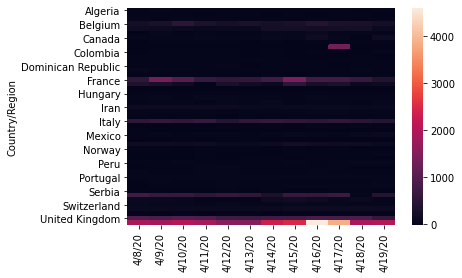

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

47 17.416666666666668


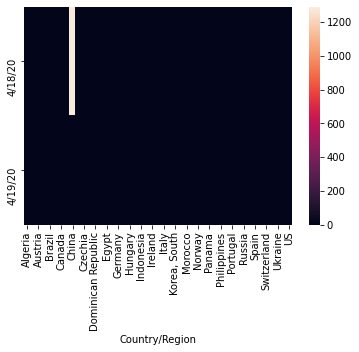

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/19/20
Country/Region,
Pakistan,2.570093
Colombia,2.288000
Canada,2.251163
Mexico,2.247544
Peru,2.050179
Russia,1.771812
Indonesia,1.511696
Romania,1.428571
Hungary,1.427481


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.6 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 4.1 MB/s eta 0:00:01     |█████████▋                      | 2.1 MB 4.1 MB/s eta 0:00:02     |█████████████                   | 2.9 MB 4.1 MB/s eta 0:00:02     |█████████████████               | 3.8 MB 4.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=bff5888c5ccd13e3347e871460f1518ab1388c5e4ab1949e6098d2f29616eb96
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
